In [1]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime
import glob
import seaborn as sns
sns.set_style("whitegrid")
pd.options.display.max_rows = 400
pd.options.display.max_columns = 500
import os
import itertools
import pickle
all_groups = map("".join, list(itertools.product('0123456789abcdef', repeat=2)))


In [2]:
fv = pickle.load( open( "graph_fv.p", "rb" ) )
from scipy.stats import pearsonr
df = pd.DataFrame(fv)

In [5]:
from matplotlib.backends.backend_pdf import PdfPages


<Figure size 432x288 with 0 Axes>

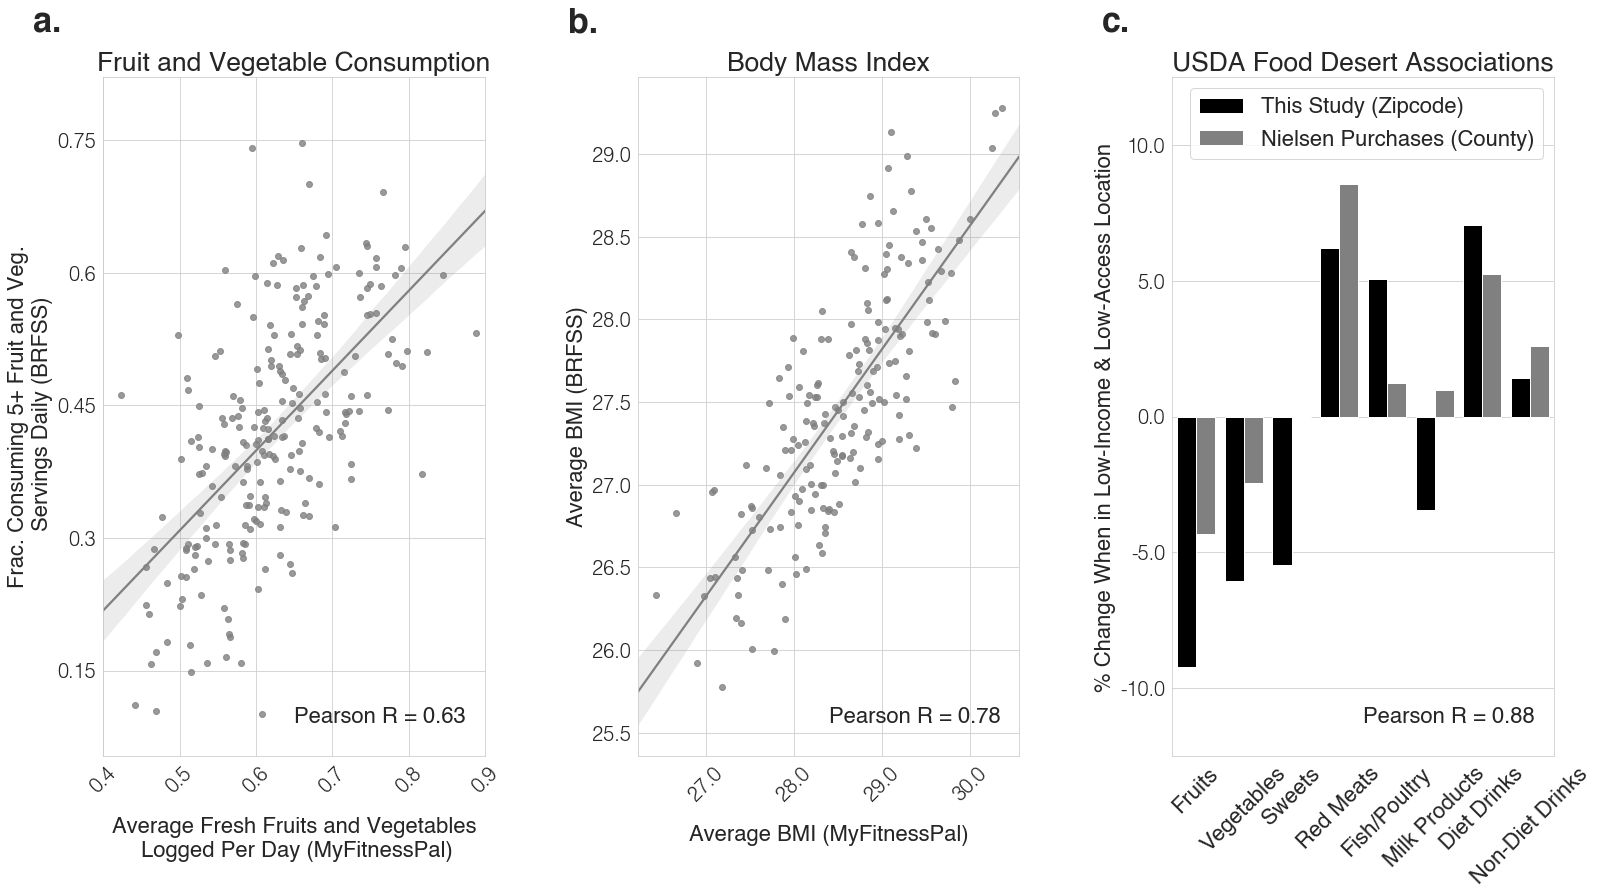

In [6]:
plt.tight_layout(pad=44, w_pad=3.5, h_pad=10.0)

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
plt.rcParams.update({'font.sans-serif':'Helvetica'})
plt.rcParams.update({'font.size': 22})


ticks_font = {'family':'Helveticalight','weight' : 'normal', 'size' : 20}


fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(26, 12.5))

fv = pickle.load( open( "graph_fv.p", "rb" ) )
g = sns.regplot(x=fv["x"], y=fv["y"], ax=axs[0],color='grey').set_title("Fruit and Vegetable Consumption")
axs[0].set_ylabel('Frac. Consuming 5+ Fruit and Veg.\n Servings Daily (BRFSS)')
axs[0].set_xlabel('Average Fresh Fruits and Vegetables\n Logged Per Day (MyFitnessPal)')
axs[0].annotate("Pearson R = 0.63",xy=(.50, .05), xycoords=axs[0].transAxes)
axs[0].set_yticklabels([0,0.15,0.3,0.45,0.6,0.75], ticks_font)
axs[0].set_xlim(0.4,0.9)
axs[0].set_xticklabels([0.4,0.5,0.6,0.7,0.8,0.9], ticks_font)


fv = pickle.load( open( "graph_bmi.p", "rb" ) )
g = sns.regplot(x=fv["x"], y=fv["y"]/100.0, ax = axs[1],color='grey').set_title("Body Mass Index")
axs[1].set_ylabel('Average BMI (BRFSS)')
axs[1].set_xlabel('Average BMI (MyFitnessPal)')
axs[1].annotate("Pearson R = 0.78",xy=(.50, .05), xycoords=axs[1].transAxes)
axs[1].set_xticklabels(axs[1].get_xticks(), ticks_font)
axs[1].set_yticklabels(axs[1].get_yticks(), ticks_font)


###
### Nielson purchase source: https://www.ers.usda.gov/webdocs/publications/45432/53943_err195.pdf?v=42276/
###

data = [{'': 'This Study (Zipcode)', 'x': 'Fruits', 'y': -9.222211291333672},
 {'': 'This Study (Zipcode)', 'x': 'Vegetables', 'y': -6.058219065055891},
 {'': 'This Study (Zipcode)', 'x': 'Sweets', 'y': -5.472229995037109},
 {'': 'This Study (Zipcode)', 'x': 'Red Meats', 'y': 6.212208187714688},
 {'': 'This Study (Zipcode)', 'x': 'Fish/Poultry', 'y': 5.075603329373127},
 {'': 'This Study (Zipcode)', 'x': 'Milk Products', 'y': -3.443731587510554},
 {'': 'This Study (Zipcode)', 'x': 'Diet Drinks', 'y': 7.033523334214572},
 {'': 'This Study (Zipcode)', 'x': 'Non-Diet Drinks', 'y': 1.4036610463332935},
 {'': 'Nielsen Purchases (County)', 'x': 'Fruits', 'y': -4.34},
 {'': 'Nielsen Purchases (County)', 'x': 'Vegetables', 'y': -2.43},
 {'': 'Nielsen Purchases (County)', 'x': 'Sweets', 'y': 0.02},
 {'': 'Nielsen Purchases (County)', 'x': 'Red Meats', 'y': 8.55},
 {'': 'Nielsen Purchases (County)', 'x': 'Fish/Poultry', 'y': 1.25},
 {'': 'Nielsen Purchases (County)', 'x': 'Milk Products', 'y': 0.97},
 {'': 'Nielsen Purchases (County)', 'x': 'Diet Drinks', 'y': 5.23},
 {'': 'Nielsen Purchases (County)', 'x': 'Non-Diet Drinks', 'y': 2.61}]
df = pd.DataFrame(data)

g = sns.barplot(x="x", y="y",data=df, hue="", palette=['black','grey'],ax=axs[2],color='darkgrey').set_title("USDA Food Desert Associations")

axs[2].set_ylim(-12.5,12.5)
axs[2].set_ylabel('% Change When in Low-Income & Low-Access Location')
axs[2].set_xlabel('')
axs[2].annotate("Pearson R = 0.88",xy=(.50, .05), xycoords=axs[2].transAxes)
axs[2].set_yticklabels(axs[2].get_yticks(), ticks_font)



matplotlib.pyplot.sca(axs[2])
plt.xticks(rotation=45)

letters=['a.','b.','c.','d.']
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
    ax.annotate(letters.pop(0),(0, 1),xytext=(-70,70),fontname='Helveticabold',fontsize=34,xycoords='axes fraction',textcoords='offset points', ha='left', va='top')
    ax.xaxis.labelpad = 20


plt.subplots_adjust(wspace=0.4)

pp = PdfPages('../FigureOutputs/Figure3.pdf')
plt.savefig(pp, format='pdf', bbox_inches = 'tight')
pp.close()